cnn created
It's all right, I'm training
It's all right, I'm training
0 0.2902848422527313
It's all right, I'm training
It's all right, I'm training
1 0.19749493896961212
It's all right, I'm training
It's all right, I'm training
2 0.1801515519618988
It's all right, I'm training
It's all right, I'm training
3 0.31353694200515747
It's all right, I'm training
It's all right, I'm training
4 0.16136091947555542
It's all right, I'm training
It's all right, I'm training
5 0.1244092583656311
It's all right, I'm training
It's all right, I'm training
6 0.22880184650421143
It's all right, I'm training
It's all right, I'm training
7 0.14624439179897308
It's all right, I'm training
It's all right, I'm training
8 0.15366311371326447
It's all right, I'm training
It's all right, I'm training
9 0.11901089549064636
It's all right, I'm training
It's all right, I'm training
10 0.11565692722797394
It's all right, I'm training
It's all right, I'm training
11 0.04808790236711502
It's all right, I'm training


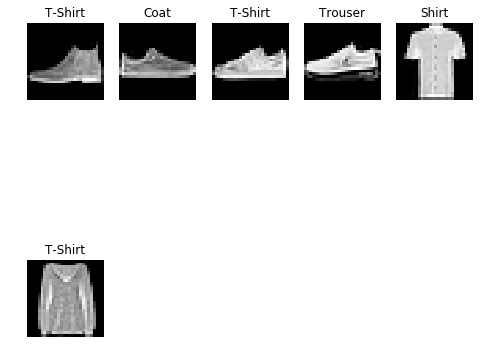

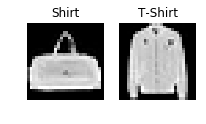

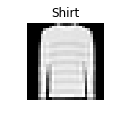

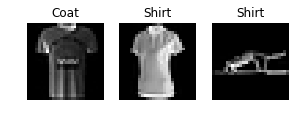

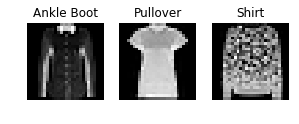

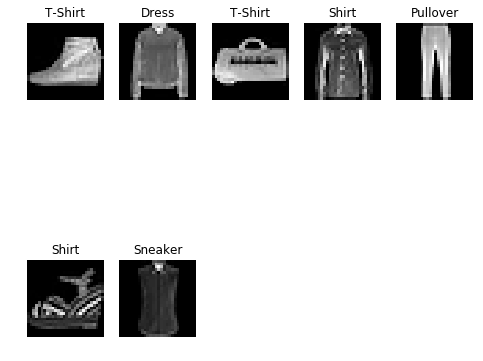

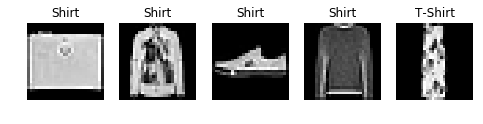

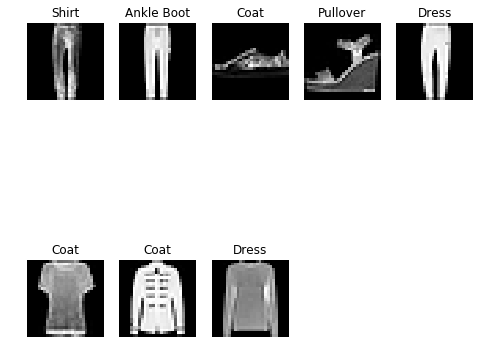

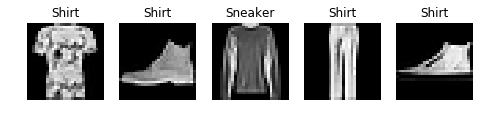

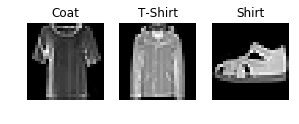

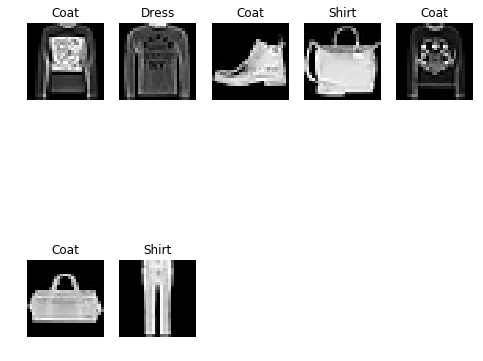

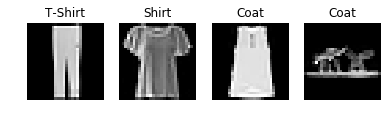

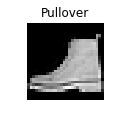

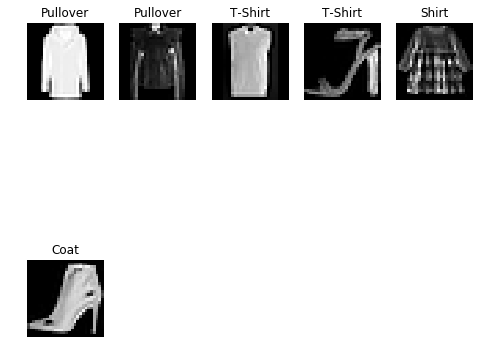

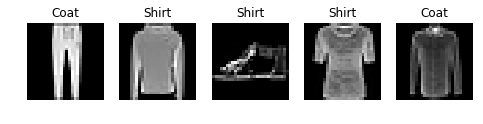

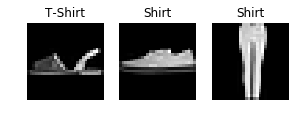

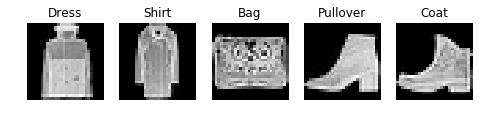

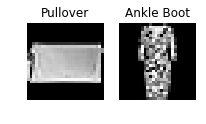

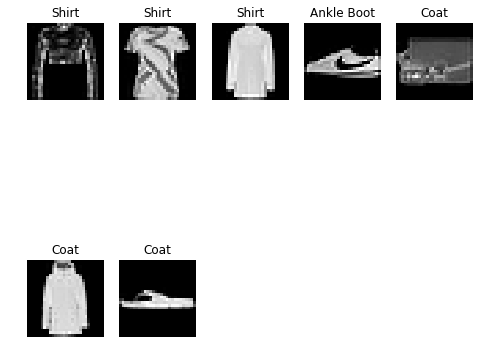

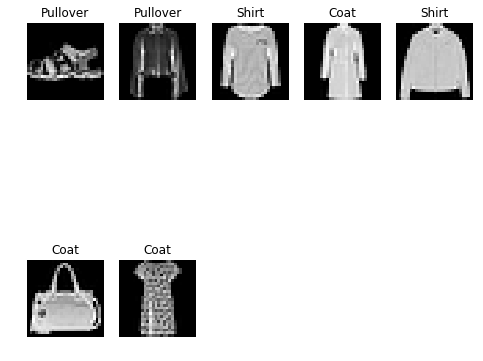

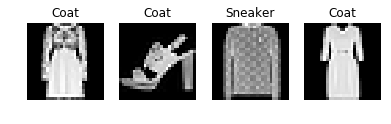

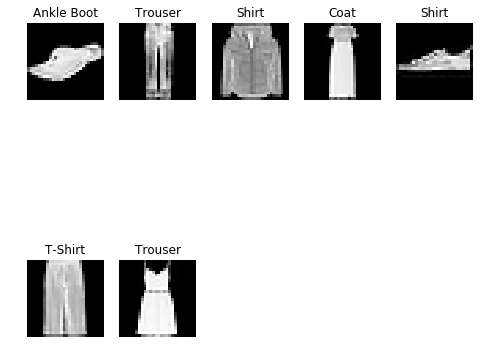

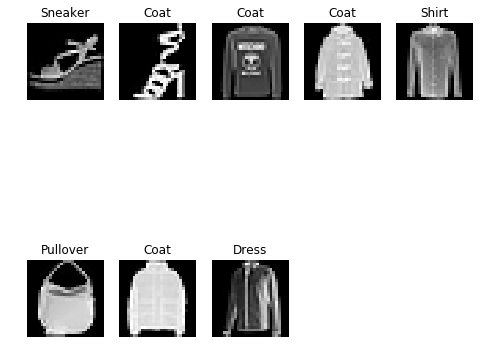

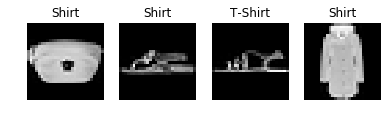

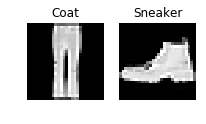

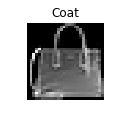

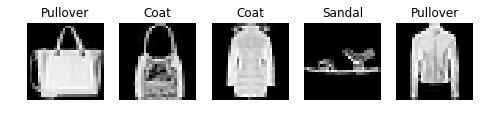

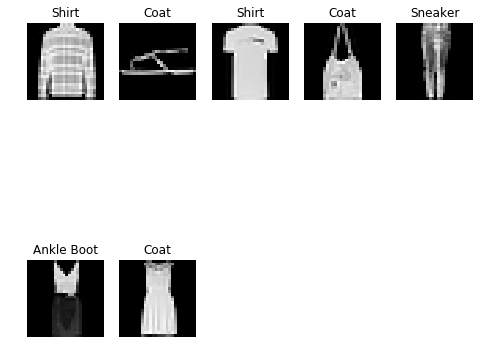

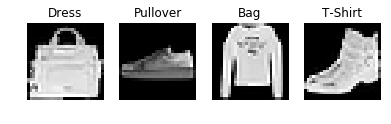

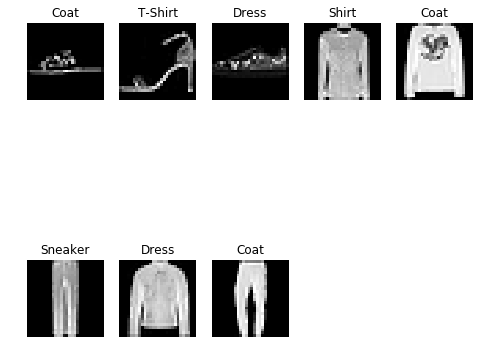

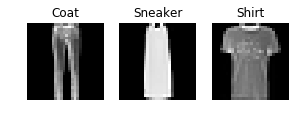

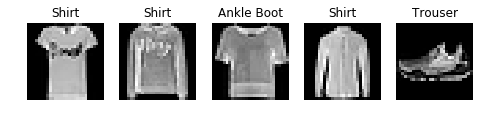

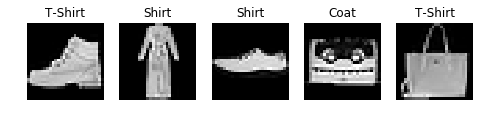

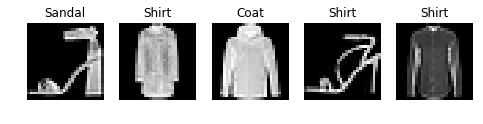

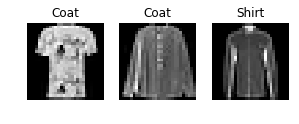

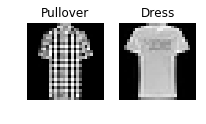

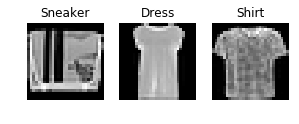

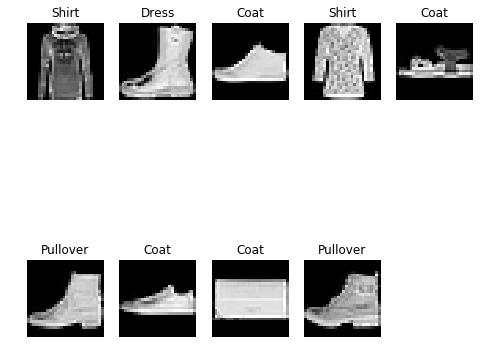

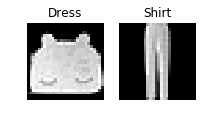

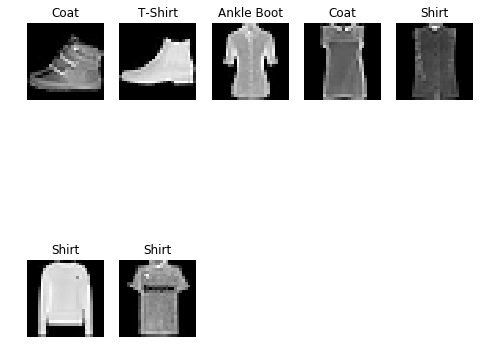

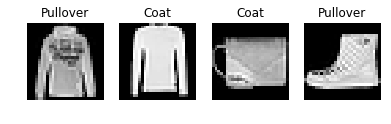

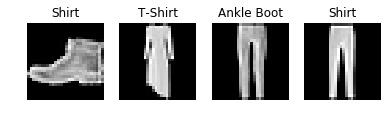

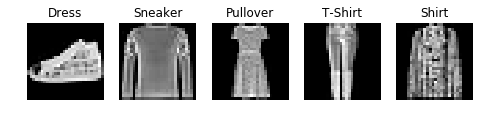

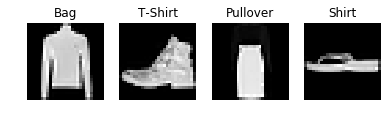

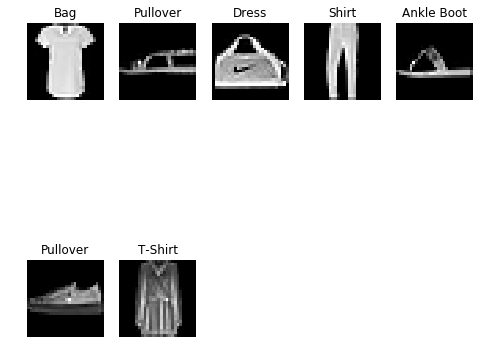

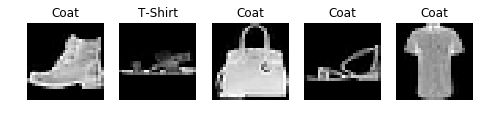

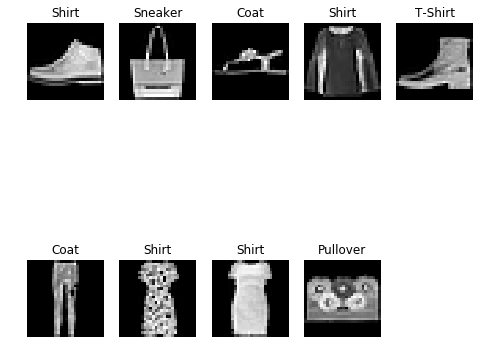

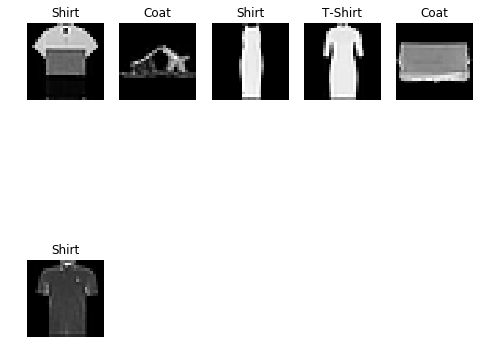

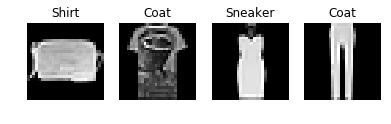

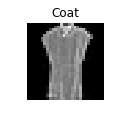

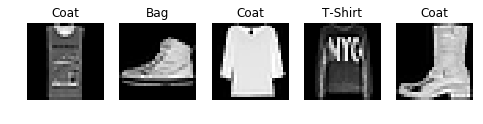

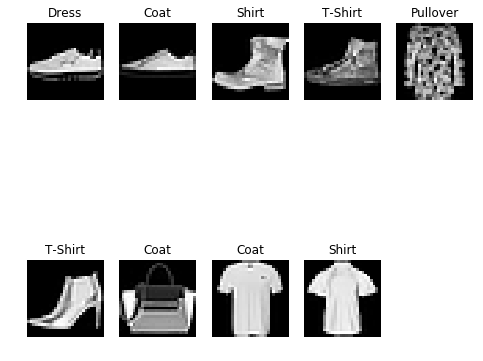

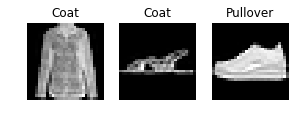

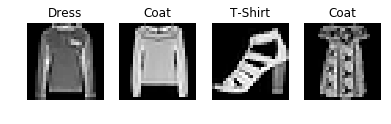

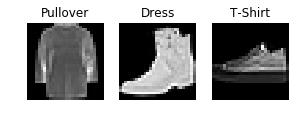

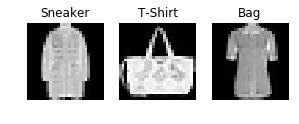

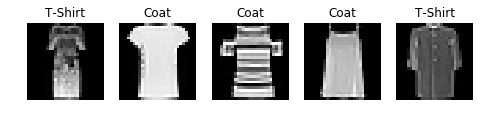

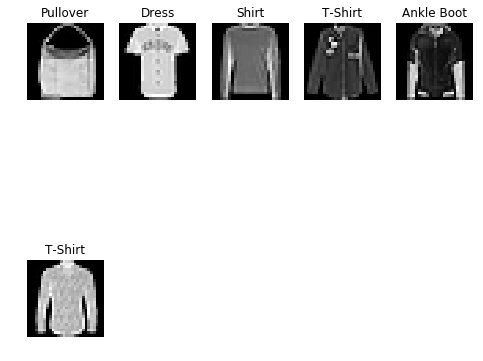

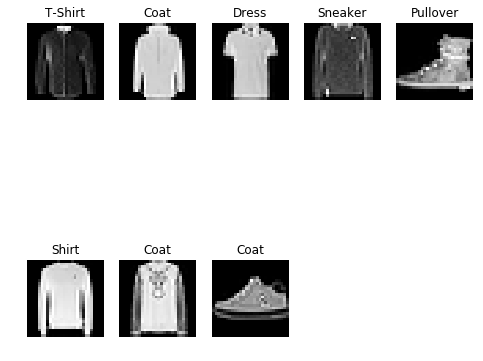

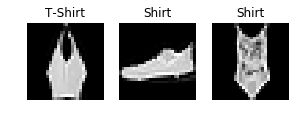

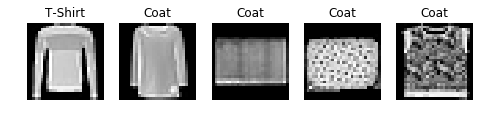

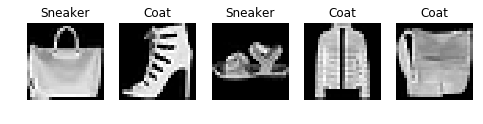

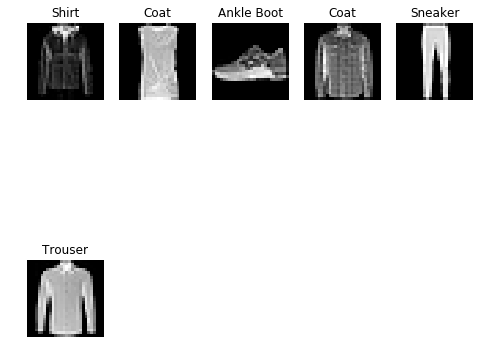

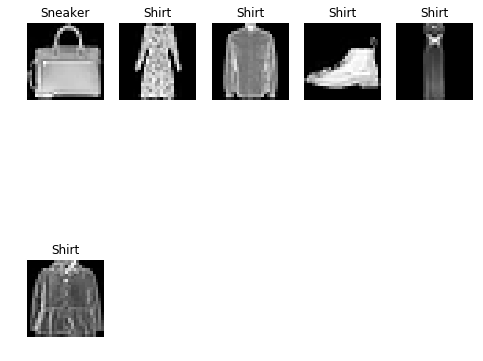

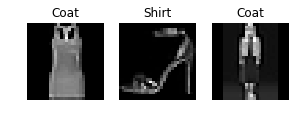

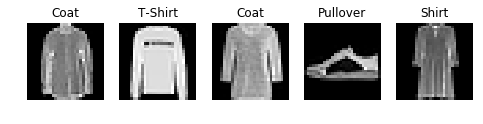

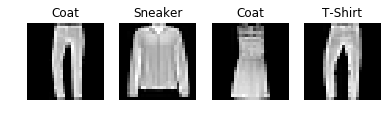

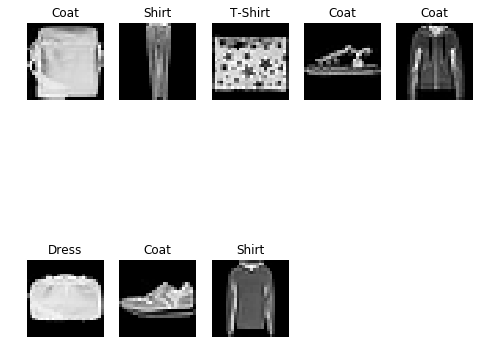

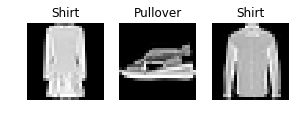

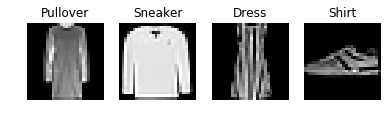

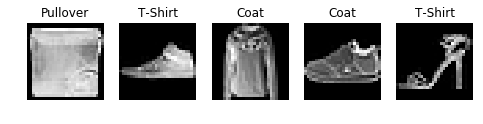

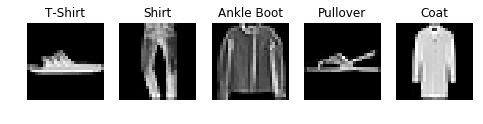

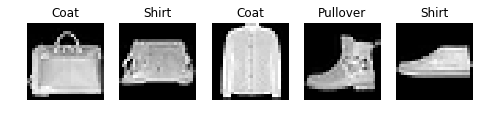

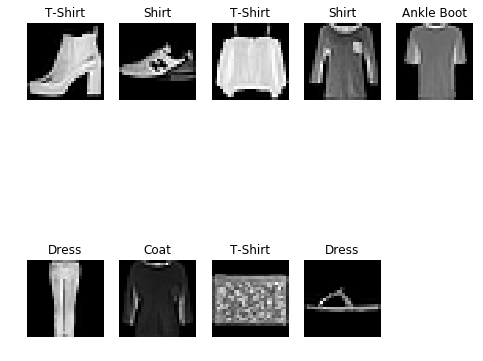

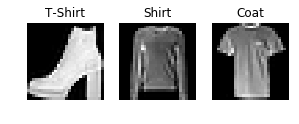

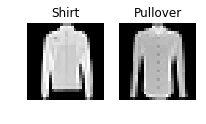

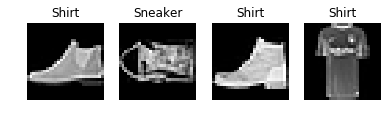

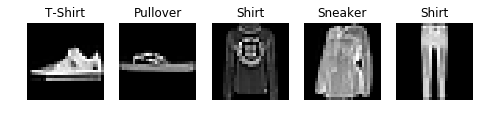

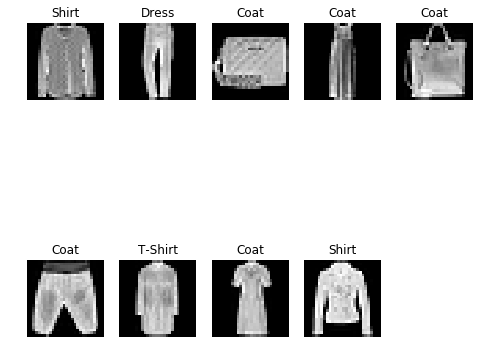

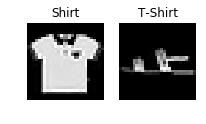

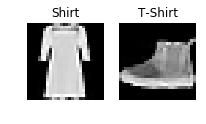

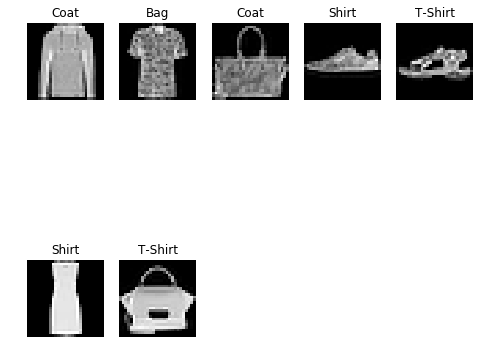

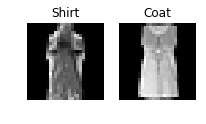

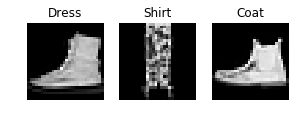

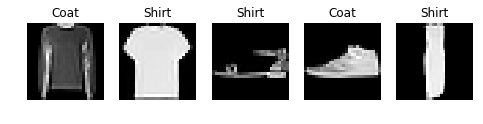

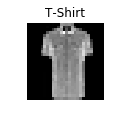

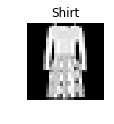

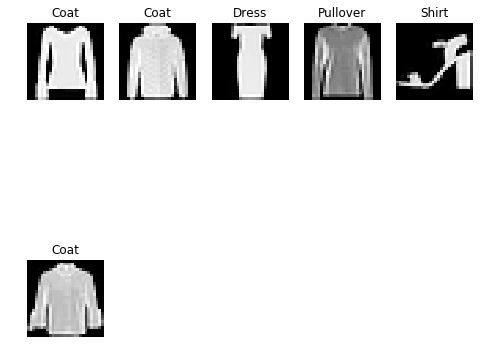

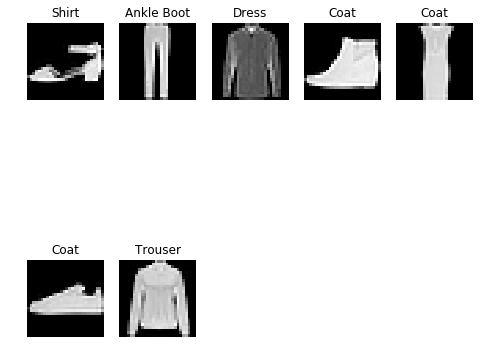

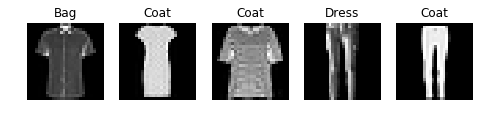

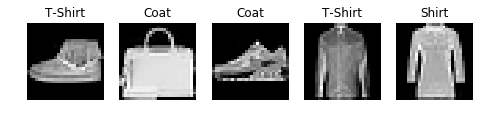

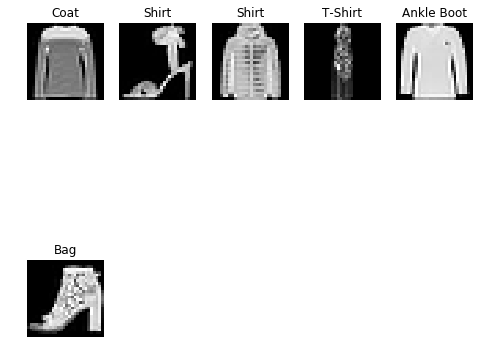

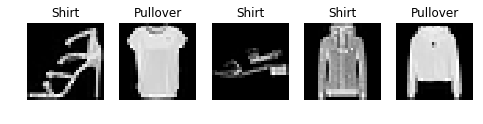

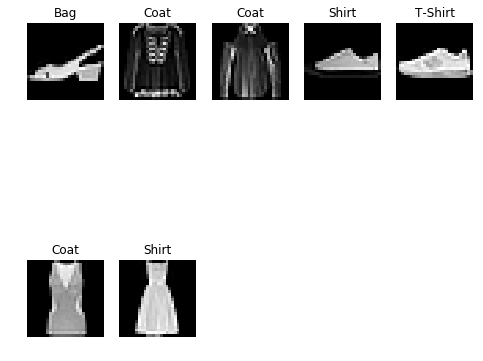

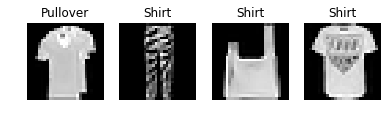

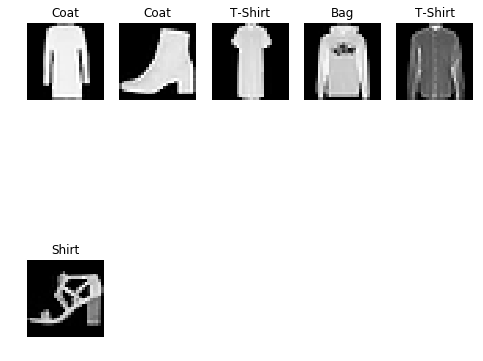

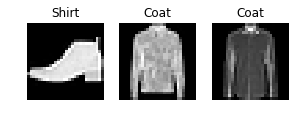

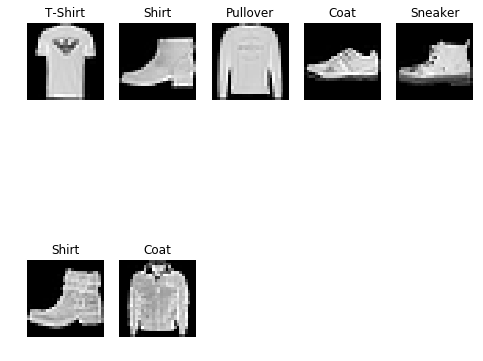

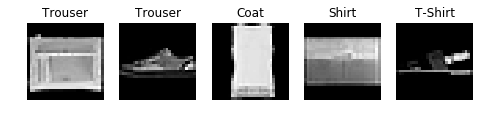

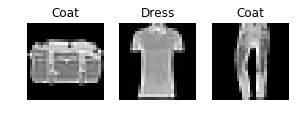

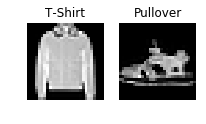

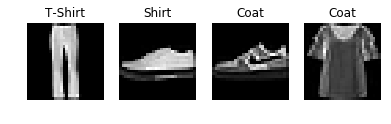

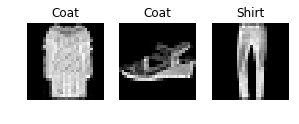

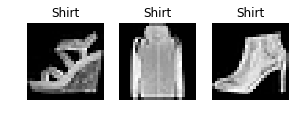

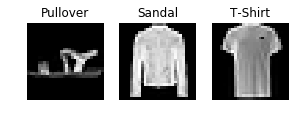

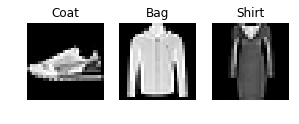

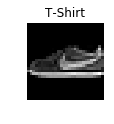

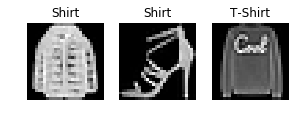

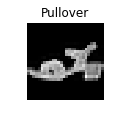

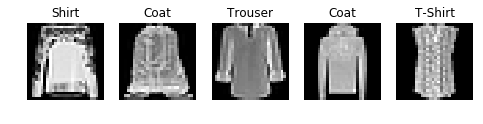

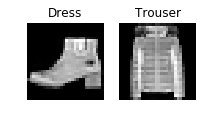

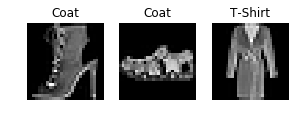

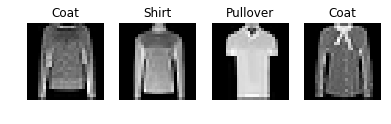

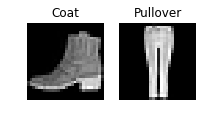

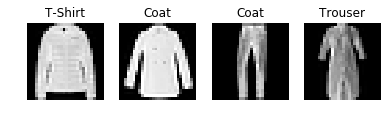

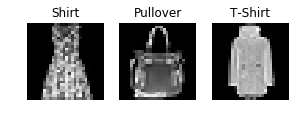

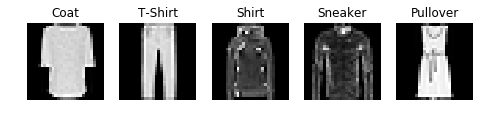

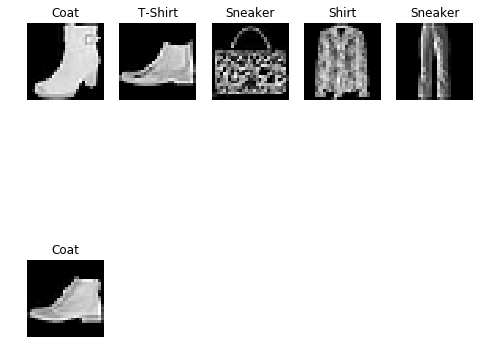

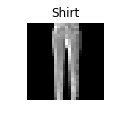

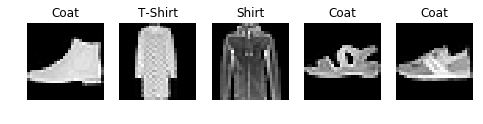

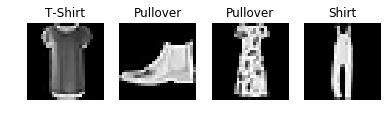

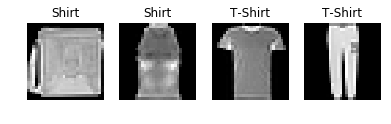

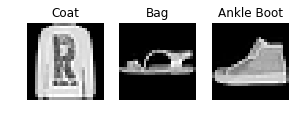

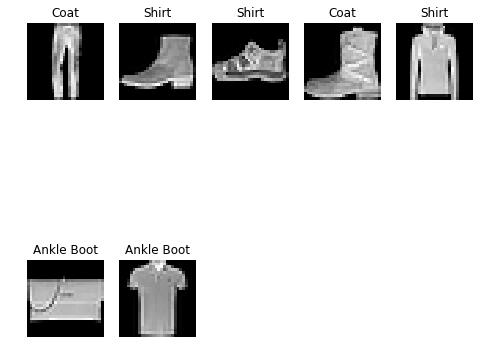

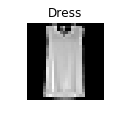

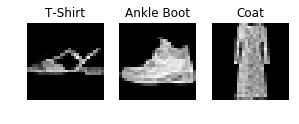

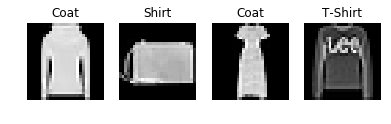

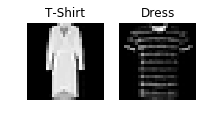

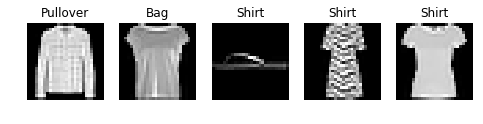

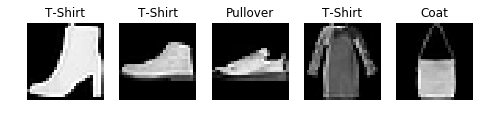

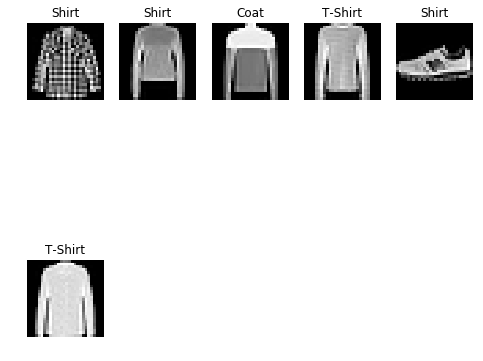

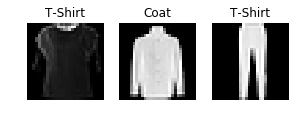

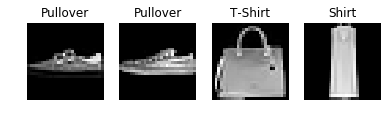

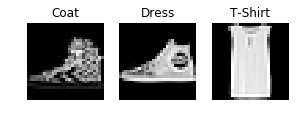

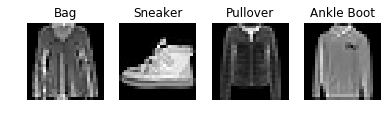

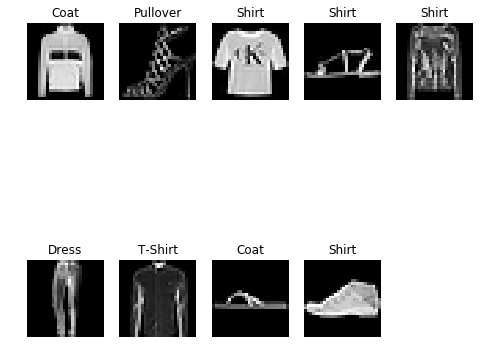

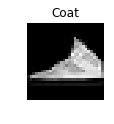

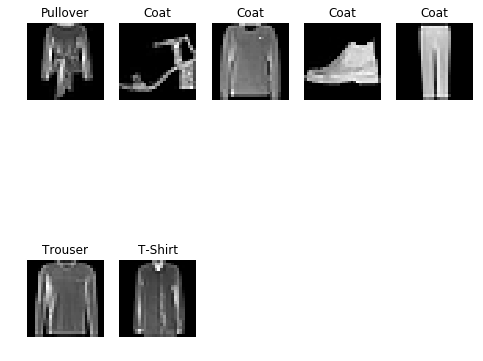

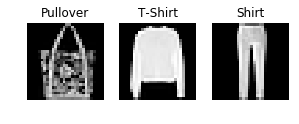

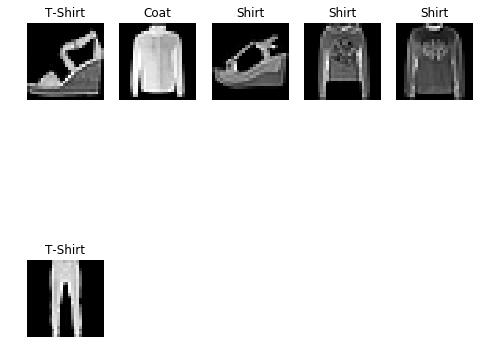

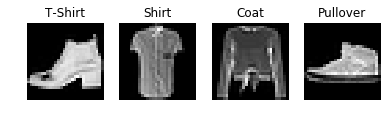

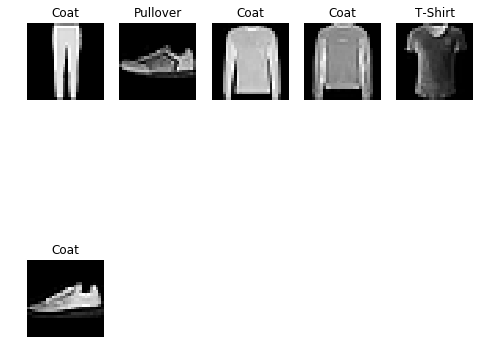

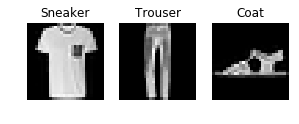

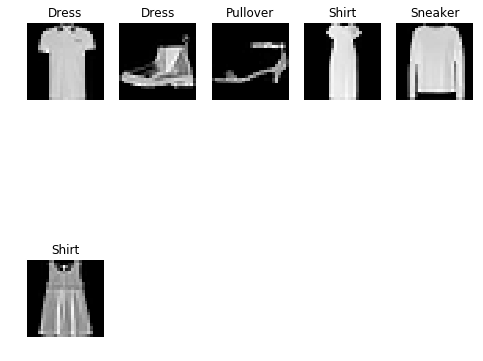

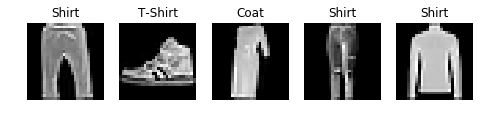

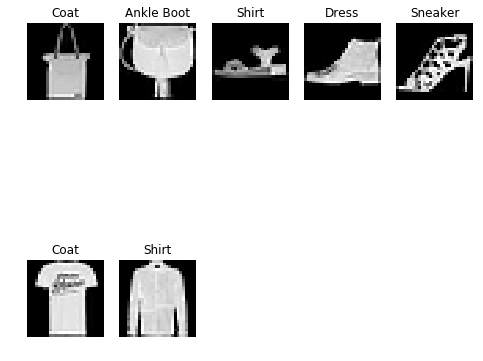

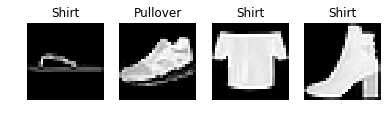

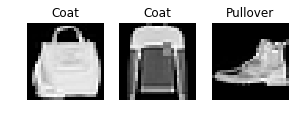

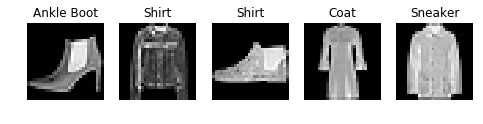

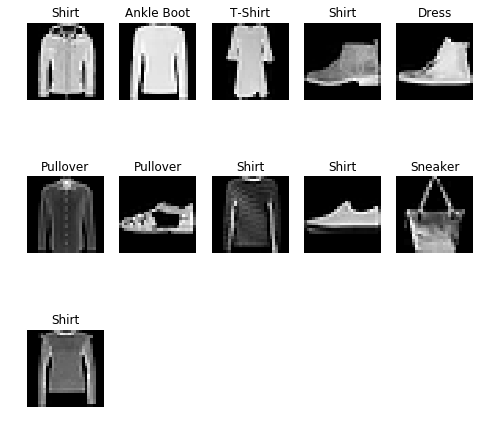

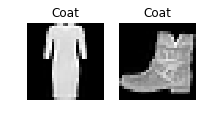

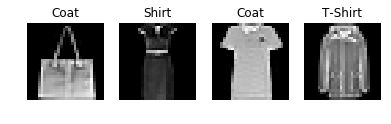

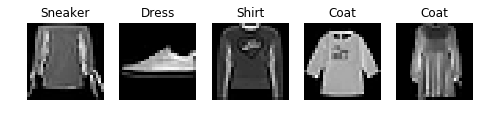

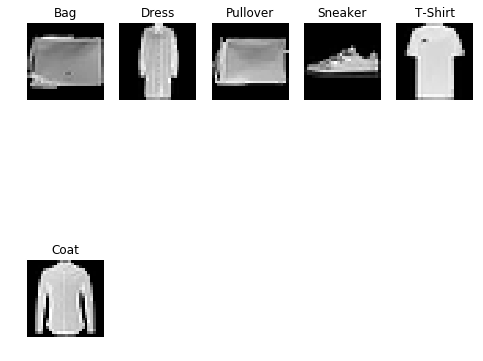

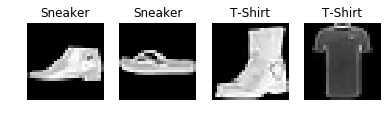

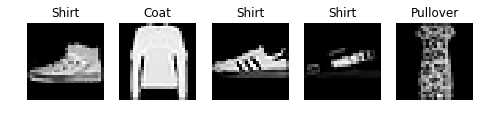

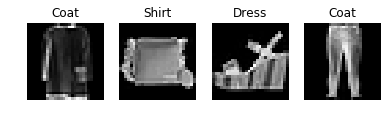

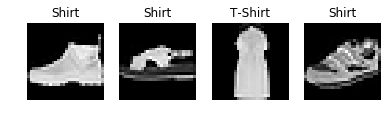

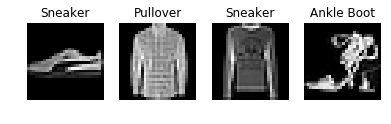

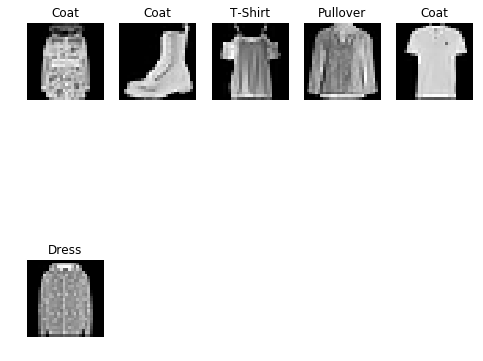

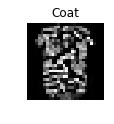

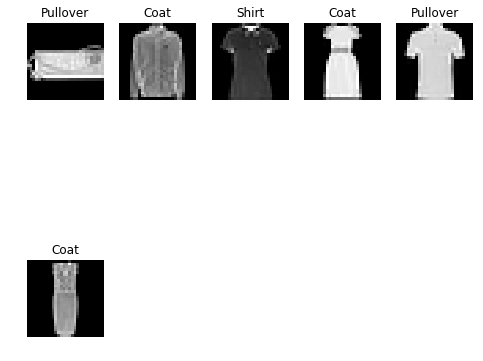

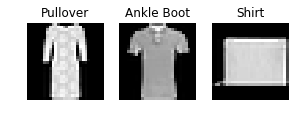

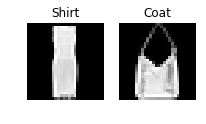

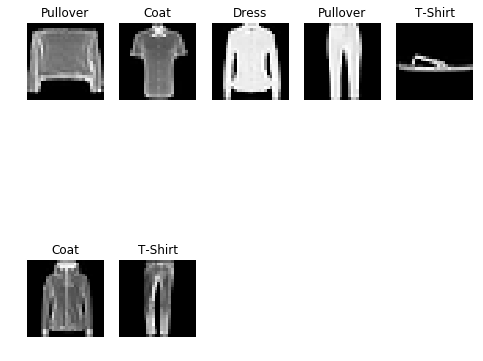

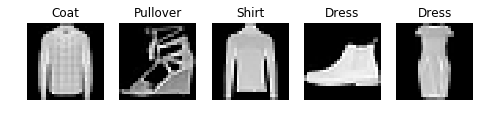

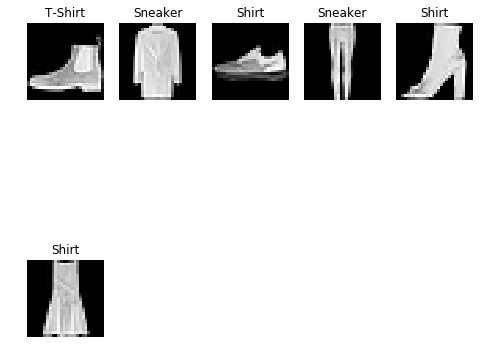

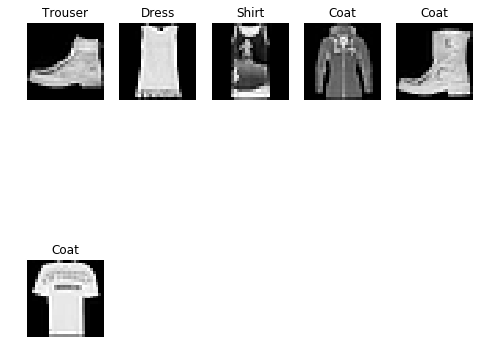

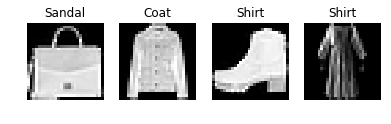

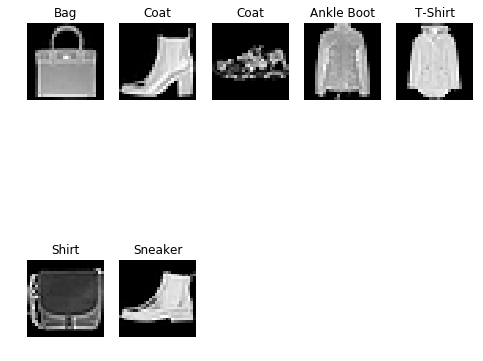

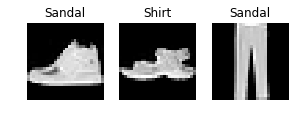

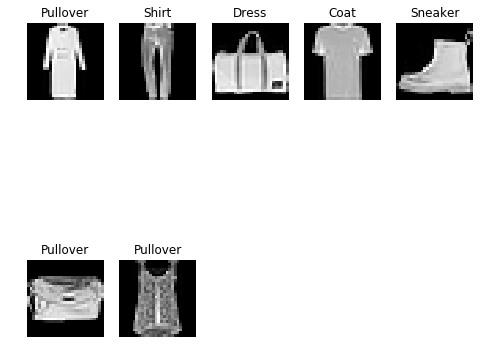

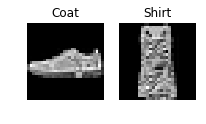

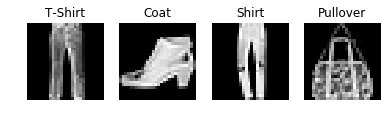

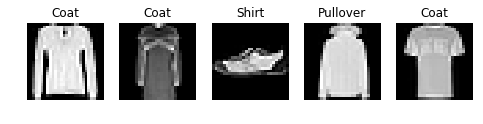

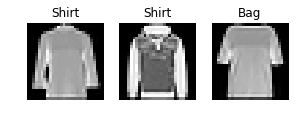

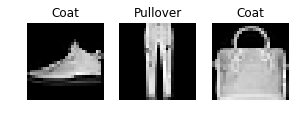

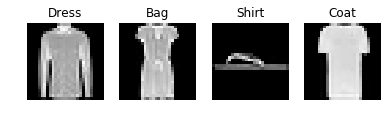

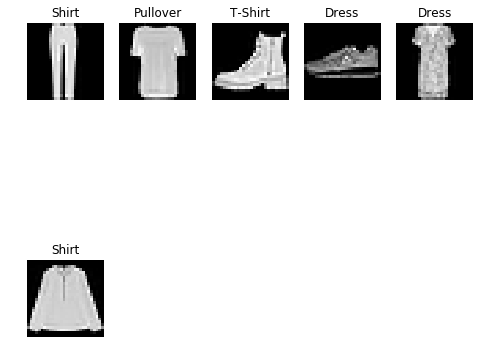

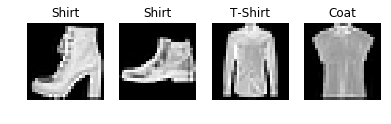

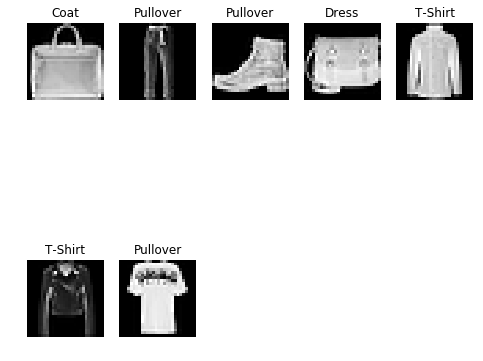

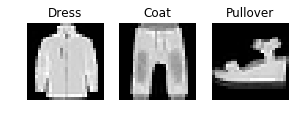

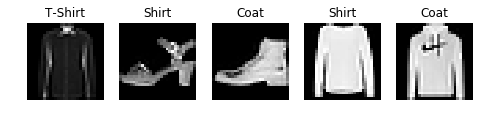

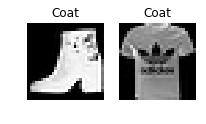

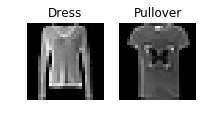

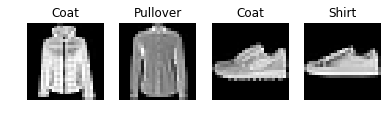

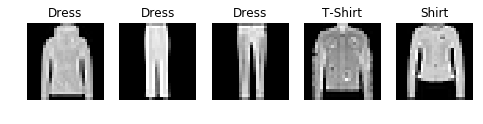

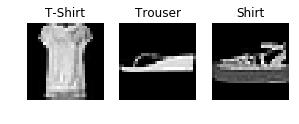

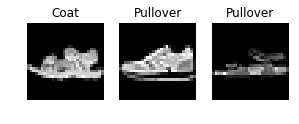

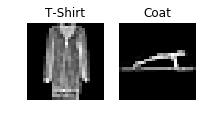

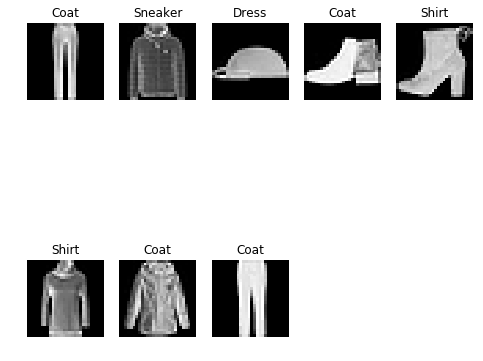

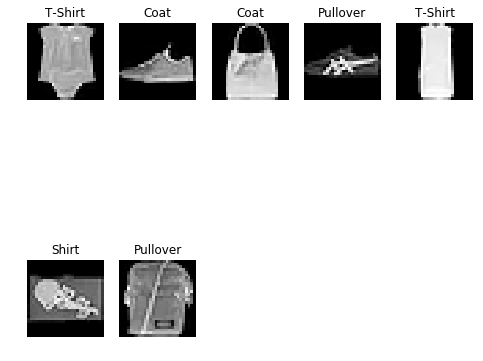

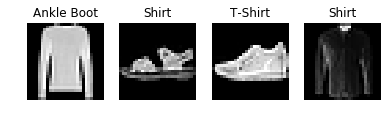

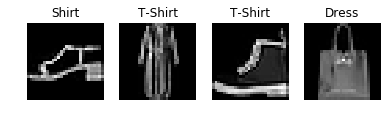

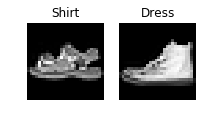

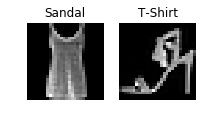

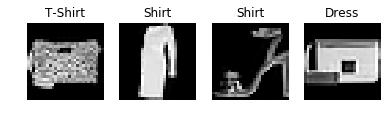

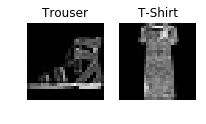

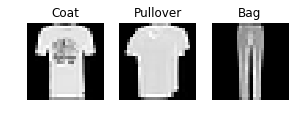

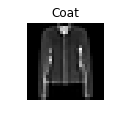

Accuracy = 91%


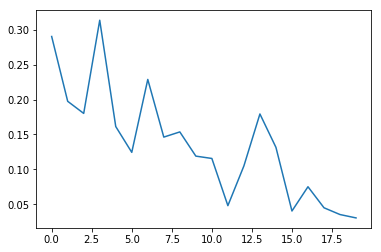

In [141]:
import torch 
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import pandas as pd;
import numpy as np;
from torch.utils.data import Dataset, DataLoader
import random;
import math;
import matplotlib.pyplot as plt


torch.manual_seed(12)
np.random.seed(12)
random.seed(12)

num_epochs = 20
batch_size = 50
learning_rate = 0.1


train_dataset = dsets.FashionMNIST(root='downloaded',
                                    train=True,
                                    transform=transforms.Compose([transforms.ToTensor()]),
                                    download=False)

test_dataset = dsets.FashionMNIST(root='downloaded', 
                                     train=False, 
                                     transform=transforms.Compose([transforms.ToTensor()]),
                                     download=False)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True);

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=True);


labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'};


def data_visualization(wrong_predicted_indices, batch_index, predicted):
    fig = plt.figure(figsize=(8,8));
    columns = 5;
    rows = len(wrong_predicted_indices) // 5 + 1;
    for i, index in enumerate(wrong_predicted_indices):
        img = test_dataset.test_data[(batch_index * batch_size + index).item()].numpy()
        fig.add_subplot(rows, columns, i + 1)
        plt.title(labels_map[predicted[index].item()])
        plt.axis('off')
        plt.imshow(img, cmap='gray')
    plt.show()
    
    
class SimpleConvNet(torch.nn.Module):
    def __init__(self):
        super(SimpleConvNet, self).__init__()
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            torch.nn.BatchNorm2d(16),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        self.fnn = torch.nn.Linear(3*3*64, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.reshape(out.size(0), -1)
        out = self.fnn(out)
        return out
    

model = SimpleConvNet()
print('cnn created')


criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

losses = []
for epoch in range(num_epochs):
    for batch_index, (images, labels) in enumerate(train_loader):
        images = Variable(images.float())
        labels = Variable(labels)
        y_pred = model(images)
        loss = criterion(y_pred, labels)        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch_index % 1000 == 0:
            print("It's all right, I'm training")
    losses.append(loss)    
    print(epoch, loss.item())
print('model trained')
    
model.eval()
correct = 0
total = 0
for batch_index, (images, labels) in enumerate(test_loader):
    images = Variable(images.float())
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    wrong_predicted_indices = torch.nonzero(torch.where(predicted != labels, 
                                                torch.ones_like(predicted),
                                                torch.zeros_like(predicted)))
    data_visualization(wrong_predicted_indices, batch_index, predicted)
    
print('Accuracy = {}%'.format(100 * correct / total))
x = [i for i in range(len(losses))]
plt.plot(x, losses, label='losses')
plt.show()